# Bibliotek

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# Analyse

## Albedo

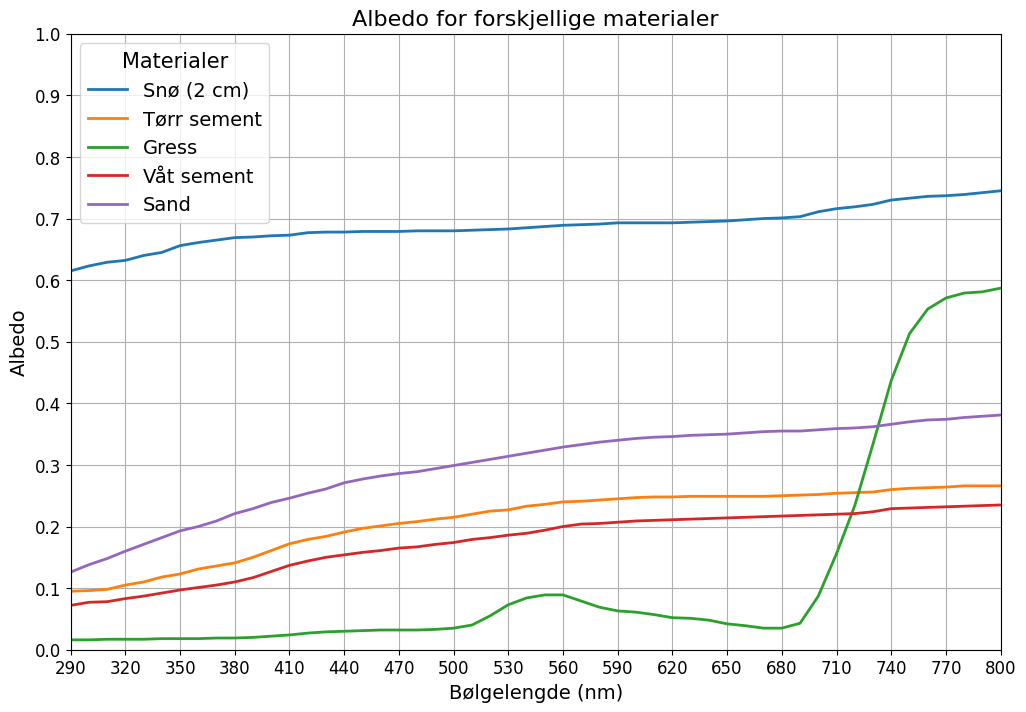

In [115]:
Albedopaths: list[list[str]] = [
    ['Data/Albedo/sno2.dat', 'Snø (2 cm)'],
    ['Data/Albedo/cdry.dat', 'Tørr sement'],
    ['Data/Albedo/gras.dat', 'Gress'],
    ['Data/Albedo/cwet.dat', 'Våt sement'],
    ['Data/Albedo/sand.dat', 'Sand']
    
]

colors = plt.get_cmap('tab10').colors
norm = plt.Normalize(0, len(Albedopaths))

plt.figure(figsize=(12, 8))
for i, (path, name) in enumerate(Albedopaths):
    data = np.loadtxt(path)
    plt.plot(data[:,0], data[:,1], label=name, color=colors[i], linewidth=2)
plt.legend(title='Materialer', fontsize=14, title_fontsize=15, loc='upper left')
plt.xlabel('Bølgelengde (nm)',fontsize=14)
plt.ylabel('Albedo',fontsize=14)
plt.title('Albedo for forskjellige materialer',fontsize=16)

plt.xlim(290, 800)
plt.ylim(0, 1)

plt.xticks(np.arange(290, 800+1, 30), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid()
plt.show()


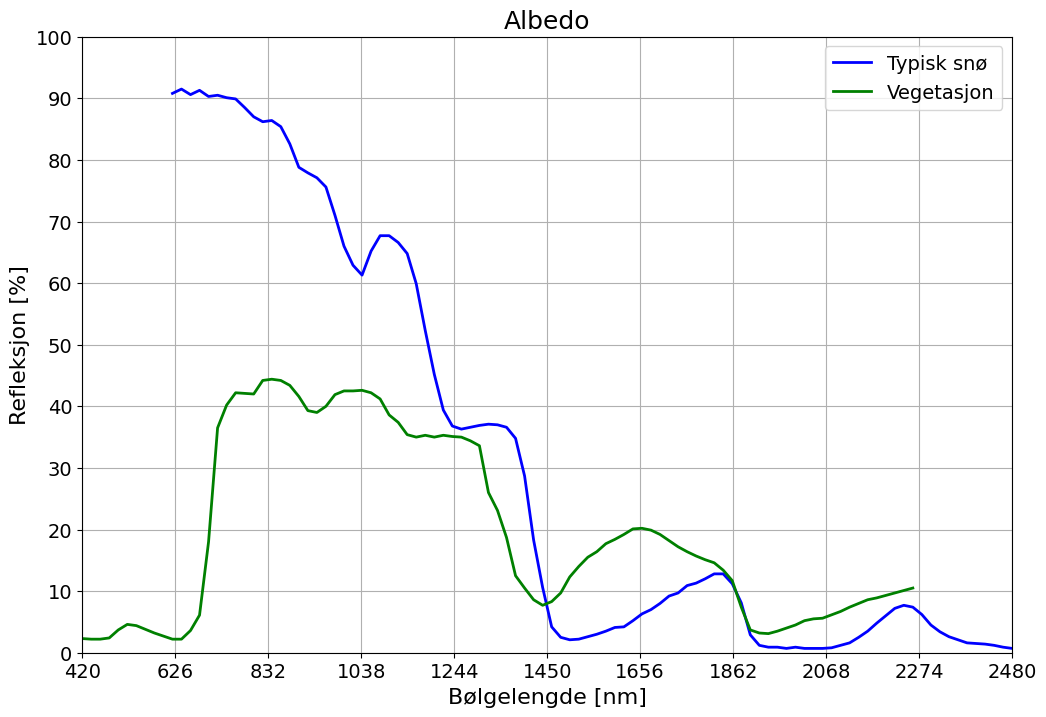

In [116]:
typ_snow = np.loadtxt('Data/Albedo/typ_snow.dat')
blue_gras = np.loadtxt('Data/Albedo/blue_gras.dat')

plt.figure(figsize=(12, 8))
plt.plot(typ_snow[:,0], typ_snow[:,1]*100, color='blue',label='Typisk snø', linewidth=2)
plt.plot(blue_gras[:,0], blue_gras[:,1]*100, color='green',label='Vegetasjon', linewidth=2)
plt.legend(fontsize=14, loc='upper right')

plt.xlabel('Bølgelengde [nm]',fontsize=16)
plt.ylabel('Refleksjon [%]',fontsize=16)
plt.title('Albedo',fontsize=18)

plt.xlim(420, 2480)
plt.ylim(0, 100)

plt.xticks(np.arange(420, 2480+1, 206), fontsize=14)
plt.yticks(np.arange(0, 100+1, 10), fontsize=14)
plt.grid()

plt.show()

## Skyer

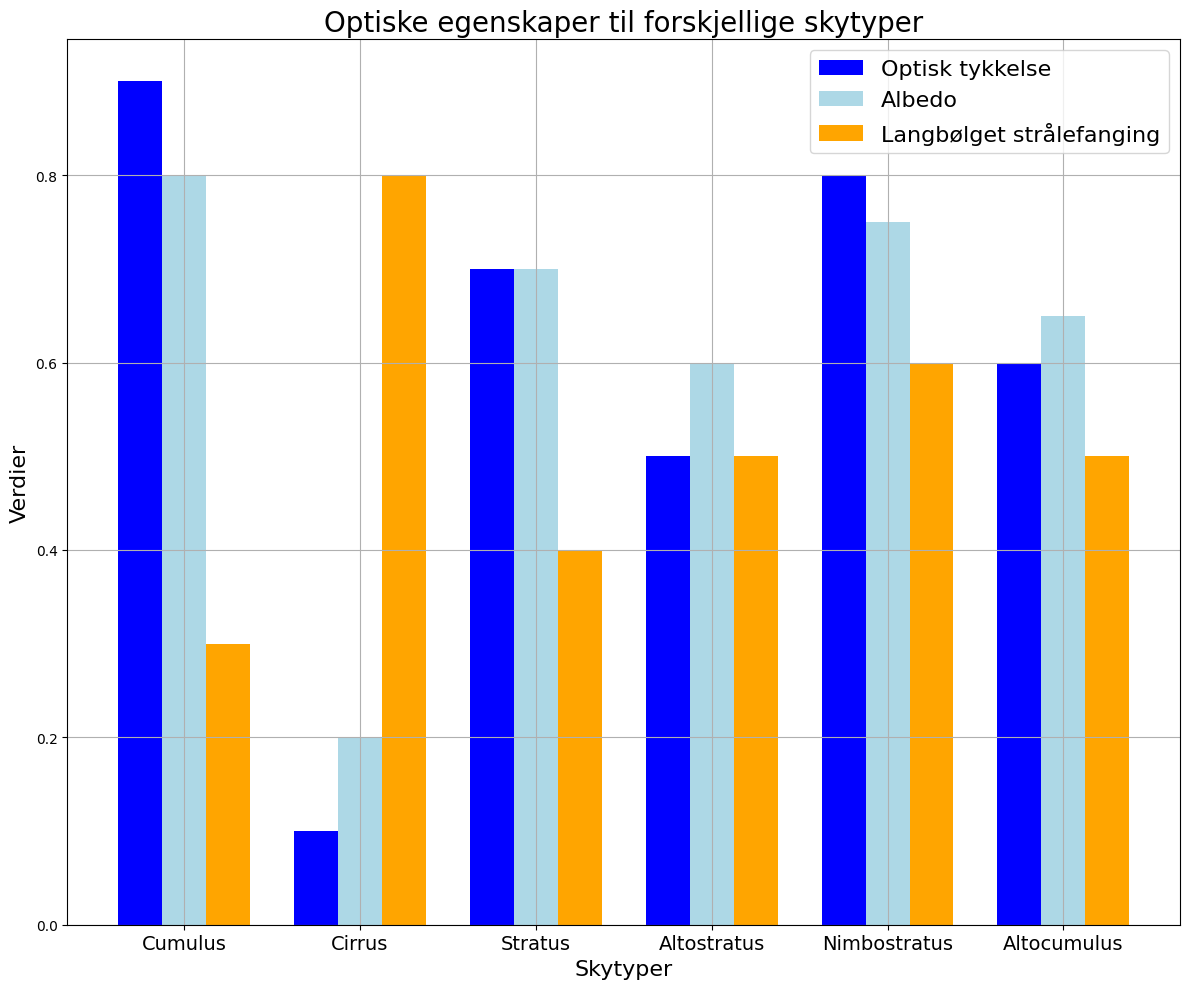

In [117]:
# Load the data
data = pd.read_csv('Data/Skyer/skydata.csv')

# Extract the data for plotting
cloud_types = data['Skytype']
optical_thickness = data['Optisk tykkelse']
reflectance = data['Albedo']
longwave_trapping = data['Langbølget strålefanging']

x = np.arange(len(cloud_types))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 10))
rects1 = ax.bar(x - width, optical_thickness, width, label='Optisk tykkelse', color='blue')
rects2 = ax.bar(x, reflectance, width, label='Albedo', color='lightblue')
rects3 = ax.bar(x + width, longwave_trapping, width, label='Langbølget strålefanging', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Skytyper', fontsize=16)
ax.set_ylabel('Verdier', fontsize=16)
ax.set_title('Optiske egenskaper til forskjellige skytyper', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(cloud_types, fontsize=14)
ax.legend(fontsize=16)
ax.grid(True)
fig.tight_layout()

plt.show()


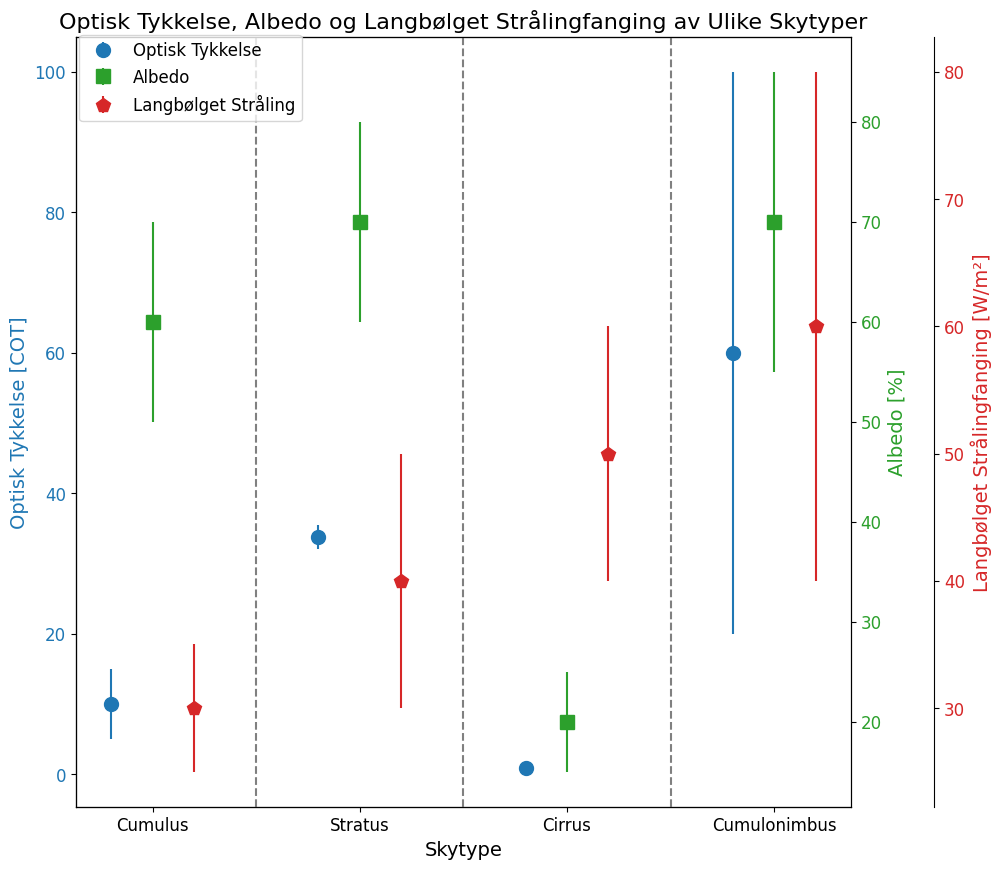

In [118]:
# Data for plotting
sky_types = ['Cumulus', 'Stratus', 'Cirrus', 'Cumulonimbus']
optical_thickness = [10, 33.8, 0.86, 60]  # Bruker gjennomsnittsverdi for Cirrus og Cumulonimbus
optical_thickness_std = [5, 1.7, 0.54, 40]  # Bruker gjennomsnittsverdi for Cirrus og Cumulonimbus
albedo = [60, 70, 20, 70]
albedo_std = [10, 10, 5, 15]
longwave_radiation = [30, 40, 50, 60]
longwave_radiation_std = [5, 10, 10, 20]

# Shifting x-values slightly for each property to avoid overlapping
x_optical_thickness = np.arange(len(sky_types)) - 0.2
x_albedo = np.arange(len(sky_types))
x_longwave_radiation = np.arange(len(sky_types)) + 0.2

fig, ax1 = plt.subplots(figsize=(10, 10))

# Plotting Optical Thickness
ax1.errorbar(x_optical_thickness, optical_thickness, yerr=optical_thickness_std, fmt='o', markersize=10, label='Optisk Tykkelse', color='tab:blue')
ax1.set_ylabel('Optisk Tykkelse [COT]', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)
ax1.set_xticks(np.arange(len(sky_types)))
ax1.set_xticklabels(sky_types, fontsize=12)
ax1.set_xlabel('Skytype', fontsize=14)

# Creating a second y-axis for Albedo
ax2 = ax1.twinx()
ax2.errorbar(x_albedo, albedo, yerr=albedo_std, fmt='s', markersize=10, label='Albedo', color='tab:green')
ax2.set_ylabel('Albedo [%]', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Creating a third y-axis for Longwave Radiation
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.errorbar(x_longwave_radiation, longwave_radiation, yerr=longwave_radiation_std, fmt='p', markersize=10, label='Langbølget Stråling', color='tab:red')
ax3.set_ylabel('Langbølget Strålingfanging [W/m²]', color='tab:red', fontsize=14)
ax3.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

for i in range(1, len(sky_types)):
    plt.axvline(x=i-0.5, color='gray', linestyle='--')

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.89), fontsize=12)

plt.title('Optisk Tykkelse, Albedo og Langbølget Strålingfanging av Ulike Skytyper', fontsize=16)
plt.show()


C:\Users\skaug\AppData\Local\Temp\ipykernel_4524\3303915079.py:64: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skaug\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


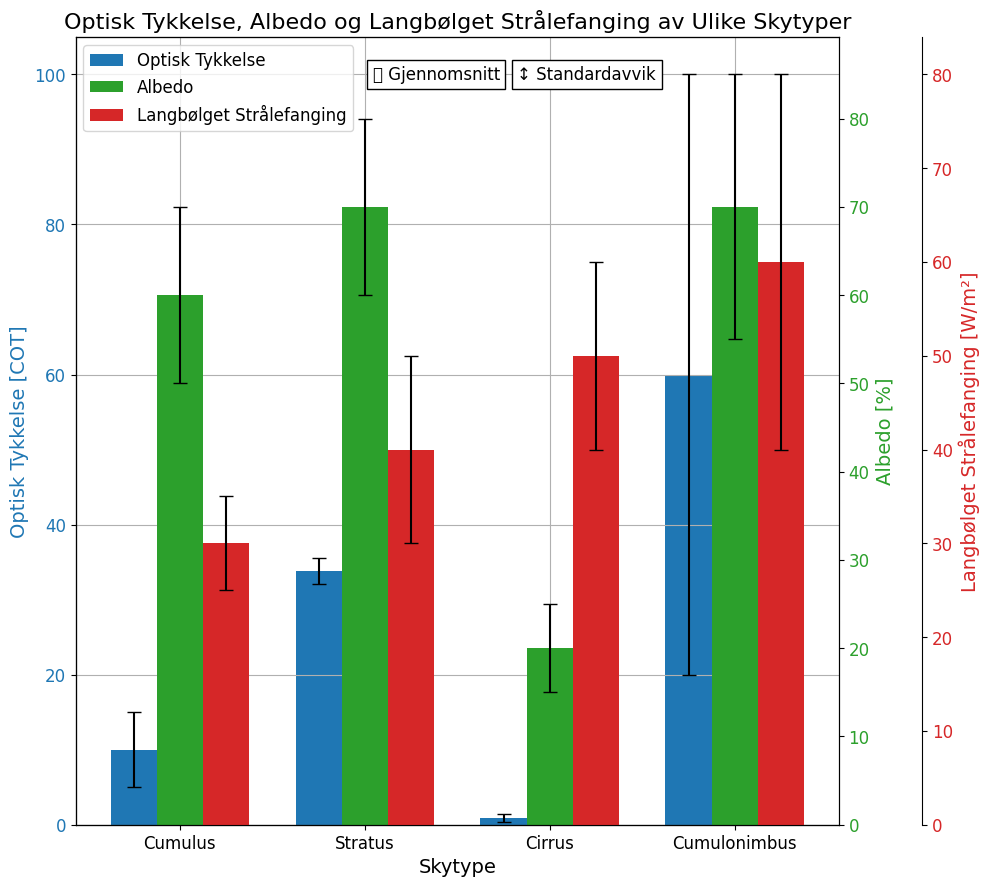

In [138]:
# Data for plotting
sky_types = ['Cumulus', 'Stratus', 'Cirrus', 'Cumulonimbus']
optical_thickness = [10, 33.8, 0.86, 60]  # Bruker gjennomsnittsverdi for Cirrus og Cumulonimbus
optical_thickness_std = [5, 1.7, 0.54, 40]  # Bruker gjennomsnittsverdi for Cirrus og Cumulonimbus
albedo = [60, 70, 20, 70]
albedo_std = [10, 10, 5, 15]
longwave_radiation = [30, 40, 50, 60]
longwave_radiation_std = [5, 10, 10, 20]

# Shifting x-values slightly for each property to avoid overlapping
x_optical_thickness = np.arange(len(sky_types)) - 0.2
x_albedo = np.arange(len(sky_types))
x_longwave_radiation = np.arange(len(sky_types)) + 0.2
# Number of bars
n_bars = len(sky_types)

# Bar width
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(n_bars)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 9))

# Plotting Optical Thickness
ax1.bar(r1, optical_thickness, yerr=optical_thickness_std, capsize=5, width=bar_width, color='tab:blue', label='Optisk Tykkelse')
ax1.set_ylabel('Optisk Tykkelse [COT]', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)
ax1.set_xticks([r + bar_width for r in range(n_bars)])
ax1.set_xticklabels(sky_types, fontsize=12)
ax1.set_xlabel('Skytype', fontsize=14)

# Creating a second y-axis for Albedo
ax2 = ax1.twinx()
ax2.bar(r2, albedo, yerr=albedo_std, capsize=5, width=bar_width, color='tab:green', label='Albedo')
ax2.set_ylabel('Albedo [%]', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Creating a third y-axis for Longwave Radiation
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.bar(r3, longwave_radiation, yerr=longwave_radiation_std, capsize=5, width=bar_width, color='tab:red', label='Langbølget Strålefanging')
ax3.set_ylabel('Langbølget Strålefanging [W/m²]', color='tab:red', fontsize=14)
ax3.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.08, 0.95), fontsize=12)

# Adding title
plt.title('Optisk Tykkelse, Albedo og Langbølget Strålefanging av Ulike Skytyper', fontsize=16)

plt.text(0.27, 0.85, '⬛ Gjennomsnitt', 
        transform=ax.transAxes, fontsize=12, va='top', ha='left', bbox=dict(facecolor='white'))
plt.text(0.4, 0.85, '↕️ Standardavvik', 
        transform=ax.transAxes, fontsize=12, va='top', ha='left', bbox=dict(facecolor='white'))

# Adding grid
ax1.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()